In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import tree
from sklearn import svm
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

In [168]:
import warnings
warnings.filterwarnings('ignore')

In [169]:
ah = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0,low_memory=False)

In [186]:
ah['Alley'] = ah['Alley'].fillna('No')
ah['Fence'] = ah['Fence'].fillna('No')
ah['PoolQC'] = ah['PoolQC'].fillna('No')
ah['MiscFeature'] = ah['MiscFeature'].fillna('No')
ah['FireplaceQu'] = ah['FireplaceQu'].fillna('No') 

<h3>Fireplaces EDA</h3>

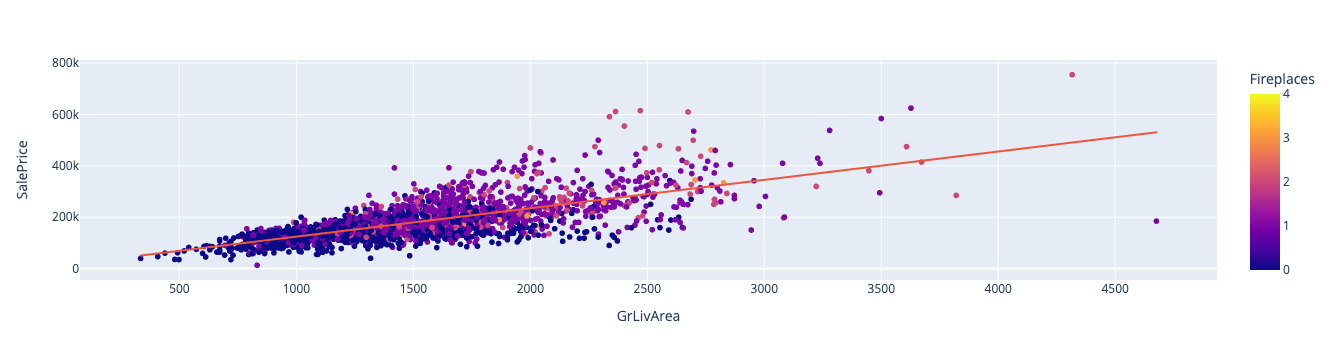

In [170]:
fig = px.scatter(ah,x='GrLivArea',y='SalePrice',color='Fireplaces',trendline='ols')
fig.show()

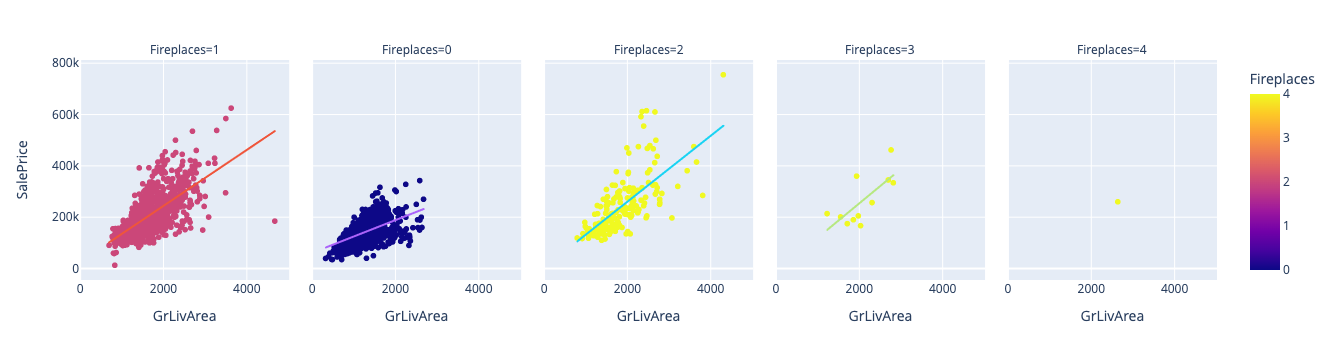

In [171]:
fig = px.scatter(ah,x='GrLivArea',y='SalePrice',facet_col='Fireplaces',color='Fireplaces',trendline='ols')
fig.show()

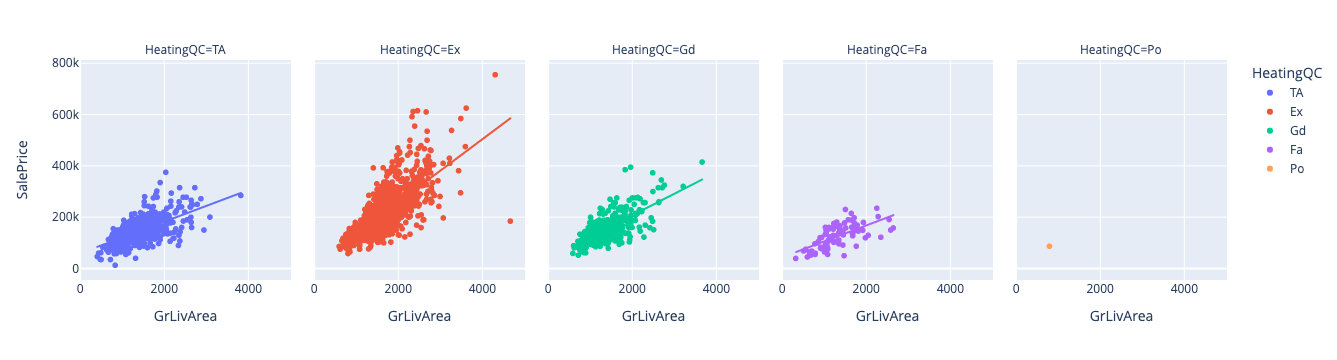

In [172]:
fig = px.scatter(ah,x='GrLivArea',y='SalePrice',facet_col='HeatingQC',color='HeatingQC',trendline='ols')
fig.show()

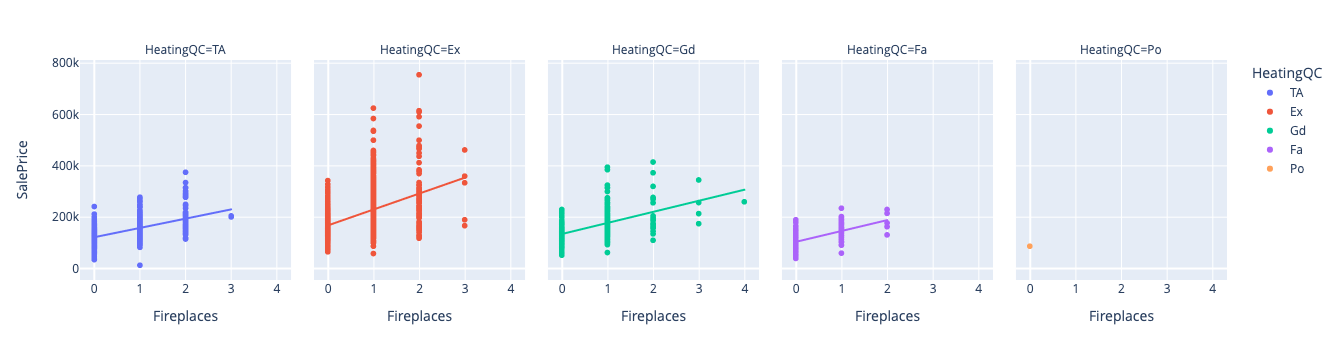

In [173]:
fig = px.scatter(ah,x='Fireplaces',y='SalePrice',facet_col='HeatingQC',color='HeatingQC',trendline='ols')
fig.show()

**Fireplaces and Heating system**

In [174]:
dummies = pd.get_dummies(ah['HeatingQC'])

In [175]:
x = ah['Fireplaces']
x = pd.concat([x,dummies],axis=1)
y = ah['SalePrice']

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=100)

In [177]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr =  lr.predict(x_test)
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
200,182900,225664.0
167,96000,114944.0
504,160000,133312.0
66,615000,275136.0
346,215000,225664.0


In [178]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_lr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_lr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
print('R squared: {:.2f}'.format(lr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 38.61
Mean Absolute Error: 43380.525839793285
Mean Square Error: 3909580299.8462534
Root Mean Square Error: 62526.63672265008


<h3>Add Neighborhood --></h3>

In [179]:
hoods = ah['Neighborhood']
new_hoods = []

for neigh in hoods :
    if neigh == 'Blueste' :
        new_hoods.append('SW')
    elif neigh == 'Blmngtn' :
        new_hoods.append('NO')
    elif neigh == 'BrDale' :
        new_hoods.append('NO')
    elif neigh == 'BrkSide' :
        new_hoods.append('DT')
    elif neigh == 'ClearCr' :
        new_hoods.append('NO')
    elif neigh == 'CollgCr' :
        new_hoods.append('SW')
    elif neigh == 'Crawfor' :
        new_hoods.append('SW')
    elif neigh == 'Edwards' :
        new_hoods.append('SW')
    elif neigh == 'Gilbert' :
        new_hoods.append('NO')
    elif neigh == 'IDOTRR' :
        new_hoods.append('DT')
    elif neigh == 'MeadowV' :
        new_hoods.append('SE')
    elif neigh == 'Mitchel' :
        new_hoods.append('SE')
    elif neigh == 'NAmes' :
        new_hoods.append('NO')
    elif neigh == 'NoRidge' :
        new_hoods.append('NW')
    elif neigh == 'NPkVill' :
        new_hoods.append('NO')
    elif neigh == 'NridgHt' :
        new_hoods.append('NW')
    elif neigh == 'NWAmes' :
        new_hoods.append('NO')
    elif neigh == 'OldTown' :
        new_hoods.append('DT')
    elif neigh == 'SWISU' :
        new_hoods.append('SW')
    elif neigh == 'Sawyer' :
        new_hoods.append('NW')
    elif neigh == 'SawyerW' :
        new_hoods.append('NW')
    elif neigh == 'Somerst' :
        new_hoods.append('NW')
    elif neigh == 'StoneBr' :
        new_hoods.append('NO')
    elif neigh == 'Timber' :
        new_hoods.append('SW')
    elif neigh == 'Veenker' :
        new_hoods.append('NW')
    elif neigh == 'Greens' :
        new_hoods.append('NW')
    elif neigh == 'GrnHill' :
        new_hoods.append('SO')
    elif neigh == 'Landmrk' :
        new_hoods.append('DT')
    else : print('no match')

ah['city_sec'] = new_hoods 

In [180]:
dummies = pd.get_dummies(ah[['HeatingQC','city_sec','CentralAir','PoolQC','MSSubClass','Heating','Electrical','FireplaceQu','Condition1']],drop_first=True)

In [181]:
x = ah[['Fireplaces','GrLivArea']]
x = pd.concat([x,dummies],axis=1)
y = ah['SalePrice']

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=100)

In [183]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr =  lr.predict(x_test)
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
200,182900,194069.848222
167,96000,95939.193979
504,160000,144671.254353
66,615000,345176.225390
346,215000,227597.109303


In [184]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_lr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_lr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
print('R squared: {:.2f}'.format(lr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 70.48
Mean Absolute Error: 28876.54649225312
Mean Square Error: 1893681808.1456156
Root Mean Square Error: 43516.454452834456


<h3>Try Random Forest --></h3>

In [190]:
print(ah.shape)
ah.T.head(20)

(2580, 82)


,1,2,3,4,5,6,7,8,9,10,...,754,755,756,757,758,759,760,761,762,763
PID,909176150,905476230,911128020,535377150,534177230,908128060,902135020,528228540,923426010,908186050,...,905102170,532376170,905377050,534430050,908128100,903205040,905402060,909275030,907192040,906223180
GrLivArea,856,1049,1001,1039,1665,1922,936,1246,889,1072,...,1040,890,1242,816,1724,952,1733,2002,1842,1911
SalePrice,126000,139500,124900,114000,227000,198500,93000,187687,137500,140000,...,129500,115000,109900,129800,196500,121000,139600,145000,217500,215000
MSSubClass,30,120,30,70,60,85,20,20,20,180,...,20,190,20,30,60,30,20,90,60,60
MSZoning,RL,RL,C (all),RL,RL,RL,RM,RL,RL,RM,...,RL,RL,RL,RL,RL,RL,RL,RH,RL,RL
LotFrontage,NaN,42.0,60.0,80.0,70.0,64.0,60.0,53.0,74.0,35.0,...,70.0,65.0,84.0,60.0,62.0,NaN,NaN,82.0,NaN,80.0
LotArea,7890,4235,6060,8146,8400,7301,6000,3710,12395,3675,...,11200,8450,17808,8550,7162,8854,13680,6270,8826,9554
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,No,No,No,No,No,No,Pave,No,No,No,...,No,No,No,No,No,No,No,No,No,No
LotShape,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,IR1,Reg,Reg,IR1


<h4>K-Fold, is better than normal test train split</h4>

In [251]:
X = ah[['Fireplaces','GrLivArea']]
target = ah.SalePrice

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size= 0.2)

In [232]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.46207060991079885

In [233]:
sv = svm.SVC()
sv.fit(X_train,y_train)
sv.score(X_test,y_test)

0.011627906976744186

In [234]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.009689922480620155

<h1>k-fold (serious face)</h1>

In [269]:
kf = KFold(n_splits = 3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [270]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [271]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [272]:
get_score(LinearRegression(),X_train,X_test,y_train,y_test)

0.5115665821881797

In [273]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [274]:
scores_lr = []
scores_svm = []
scores_rf = []

for train_index, test_index in kf.split(X):
    X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],target.iloc[train_index],target.iloc[test_index]
    scores_lr.append(get_score(LinearRegression(),X_train,X_test,y_train,y_test))
    scores_svm.append(get_score(svm.SVC(),X_train,X_test,y_train,y_test))
    scores_rf.append(get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test))

In [275]:
print(scores_lr)
print(scores_svm)
print(scores_rf)

[0.5265675111265051, 0.5909861248599723, 0.5166008842818054]
[0.013953488372093023, 0.009302325581395349, 0.011627906976744186]
[0.009302325581395349, 0.005813953488372093, 0.005813953488372093]


<h2>Cross-val method does the same thing ^^^</h2>

In [276]:
from sklearn.model_selection import cross_val_score

In [280]:
cross_val_score(LinearRegression(), X,target)

array([0.52318737, 0.56524226, 0.56279951, 0.58047232, 0.49455119])

In [281]:
cross_val_score(svm.SVC(), X,target)

array([0.00968992, 0.00968992, 0.00968992, 0.01162791, 0.01356589])

In [283]:
cross_val_score(RandomForestClassifier(n_estimators=40), X,target)

array([0.00581395, 0.00387597, 0.00387597, 0.00775194, 0.01162791])

In [284]:
cross_val_score(RandomForestClassifier(n_estimators=5), X,target)

array([0.00581395, 0.00193798, 0.00387597, 0.01162791, 0.00968992])